In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm
import matplotlib
import matplotlib as mpl
import glob
from datetime import datetime
import itertools

color = [cm.coolwarm(x) for x in np.linspace(0,1,257)]
matplotlib.rcParams.update({'font.size': 18})
mpl.rcParams['figure.figsize'] = [10, 5]

In [2]:
def view_EIS_LSV(data):
    if data.shape[1] == 72:
        label = 'EIS'
        color = [cm.coolwarm(x) for x in range(len(data))]
        fig = plt.figure(figsize=(12, 8))
        for i in range(len(data)):
            plt.figure()
            plt.plot(data[i][:36], -data[i][36:], color=color[i])
            plt.show()

In [ ]:
X, y = np.load('./data/EIS_data.npy'), np.load('./data/I_sample.npy')
view_EIS_LSV(X)

In [4]:
def sortKeyFunc(s):
    return int(os.path.basename(s)[0:-8])

def load_dataset(folder):
    files = glob.glob(f'../txt_data/{folder}/*.txt')
    assert folder in ['LSV', 'EIS'], "folder should be either LSV or EIS"
    files.sort(key=lambda s: int(os.path.basename(s)[0:-8])) # glob returns list with arbitrary order
    print(files)
    merged_data = pd.DataFrame()
    
    for file in files:
        cell = pd.read_csv(file, delim_whitespace=True)
        merged_data = pd.concat([merged_data, cell], axis=1)
    
    return merged_data

In [9]:
# data process for LSV and EIS
folder = ['LSV', 'EIS']
for test in folder:
    dataset = load_dataset(test)
    dataset.to_csv(f'./data{test}_merged.csv', index=False)

['../txt_data/LSV/1 (1).txt', '../txt_data/LSV/1 (2).txt', '../txt_data/LSV/1 (3).txt', '../txt_data/LSV/1 (4).txt', '../txt_data/LSV/1 (5).txt', '../txt_data/LSV/1 (6).txt', '../txt_data/LSV/1 (7).txt', '../txt_data/LSV/2 (1).txt', '../txt_data/LSV/2 (2).txt', '../txt_data/LSV/2 (3).txt', '../txt_data/LSV/2 (4).txt', '../txt_data/LSV/2 (5).txt', '../txt_data/LSV/2 (6).txt', '../txt_data/LSV/2 (7).txt', '../txt_data/LSV/3 (1).txt', '../txt_data/LSV/3 (2).txt', '../txt_data/LSV/3 (3).txt', '../txt_data/LSV/3 (4).txt', '../txt_data/LSV/3 (5).txt', '../txt_data/LSV/3 (6).txt', '../txt_data/LSV/3 (7).txt', '../txt_data/LSV/4 (1).txt', '../txt_data/LSV/4 (2).txt', '../txt_data/LSV/4 (3).txt', '../txt_data/LSV/4 (4).txt', '../txt_data/LSV/4 (5).txt', '../txt_data/LSV/4 (6).txt', '../txt_data/LSV/4 (7).txt', '../txt_data/LSV/5 (1).txt', '../txt_data/LSV/5 (2).txt', '../txt_data/LSV/5 (3).txt', '../txt_data/LSV/5 (4).txt', '../txt_data/LSV/5 (5).txt', '../txt_data/LSV/5 (6).txt', '../txt_data/

In [ ]:
folder = 'EIS'
files = glob.glob(f'../txt_data/{folder}/*.txt')
files.sort(key=lambda s: int(os.path.basename(s)[0:-8]))
test_size = len(files)
Z_color = [cm.coolwarm(x) for x in range(test_size)]
for file in files:
    cell = pd.read_csv(file, delim_whitespace=True)
    Z_Re = cell['Re(Z)/Ohm']
    Z_Im = -cell['-Im(Z)/Ohm']
    plt.plot(Z_Re, -Z_Im, label=file.split('/')[-1][:-4])
    plt.legend()
    plt.show()
# plt.show()

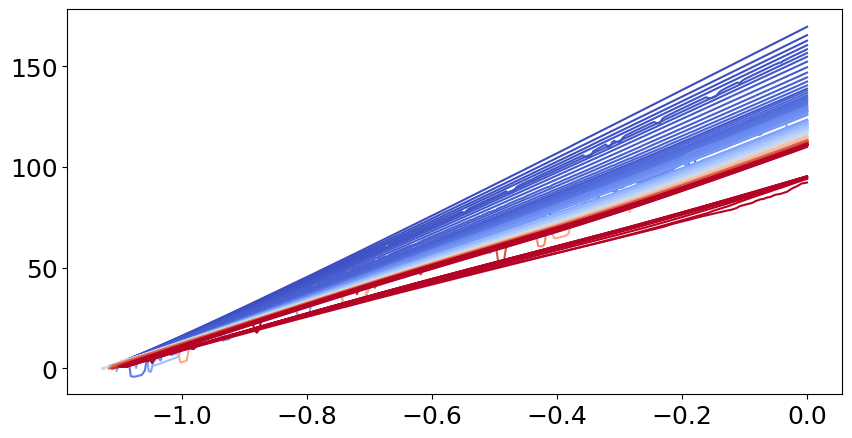

In [5]:
folder = 'LSV'
files = glob.glob(f'../txt_data/{folder}/*.txt')
files.sort(key=lambda s: int(os.path.basename(s)[0:-8]))
test_size = len(files)
EI_color = [cm.coolwarm(x) for x in range(test_size)]
for k, file in enumerate(files):
    cell = pd.read_csv(file, delim_whitespace=True)
    I = cell['<I>/mA']
    E = cell['Ewe/V']
    plt.plot(E[2:], I[2:], color=EI_color[k])
    # plt.legend()
    # plt.show()
plt.show()

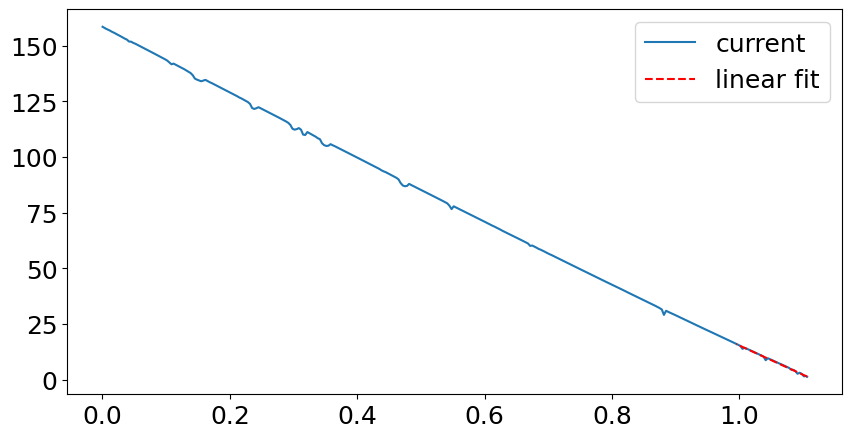

In [3]:
test_label = '1 (5)'
file = f'../txt_data/LSV/{test_label}.txt'
cell = pd.read_csv(file, delim_whitespace=True)
I = cell['<I>/mA']
E = -cell['Ewe/V']
plt.plot(E[2:], I[2:], label='current')
z = np.polyfit(E[2:36], I[2:36], deg=1)
p = np.poly1d(z)
plt.plot(E[2:36], p(E[2:36]), 'r--', label='linear fit')
# plt.plot(E[2:], np.diff(I[1:]), label='diff I')
plt.legend()
# plt.show()
plt.show()

In [5]:
folder = 'CP'
files = glob.glob(f'../txt_data/{folder}/*.txt')
files.sort(key=lambda s: int(os.path.basename(s).split('_')[0]))
print(files[100], os.path.basename(files[100]).split('_')[0])
# files

../txt_data/CP/17_18_CP_C01.txt 17


In [8]:
# process for the CP data
folder = 'CP'
files = glob.glob(f'../txt_data/{folder}/*.txt')
files.sort(key=lambda s: int(os.path.basename(s).split('_')[0])) # glob returns list with arbitrary order

merged_data = pd.DataFrame()
for file in files:
    cell = pd.read_csv(file, sep='\t')
    cell['time/s'] = pd.to_datetime(cell['time/s'], format='%m/%d/%Y %H:%M:%S.%f')
    merged_data = pd.concat([merged_data, cell.iloc[:,:3]], axis=1)
merged_data.to_csv(f'./data/{folder}_merged.csv', index=False)

In [10]:
time_series = []
CP_data = pd.read_csv('./data/CP_merged.csv', low_memory=False)
cnt = 0
for i in range(1, 43):
    CP_files = glob.glob(f'../txt_data/CP/{i}_*.txt')
    time = [CP_data.iloc[:, cnt*3][0]]
    for _ in range(len(CP_files)):
        last_ind = CP_data.iloc[:, cnt*3].last_valid_index()
        time.append(CP_data.iloc[:, cnt*3][last_ind])
        cnt += 1
    if i == 13:
        time.pop()
    print(f'cycle: {i}', time)
    time_series.append(time)

time_list = list(itertools.chain(*time_series))

cycle: 1 ['2023-07-17 15:07:18.847', '2023-07-17 16:07:18.451300', '2023-07-17 17:10:01.942500', '2023-07-17 18:12:45.291000', '2023-07-17 19:15:28.802600', '2023-07-17 20:18:12.299600', '2023-07-17 21:20:55.541700']
cycle: 2 ['2023-07-17 22:48:13.822600', '2023-07-18 00:48:13.426500', '2023-07-18 02:50:56.664000', '2023-07-18 04:53:39.846500', '2023-07-18 06:56:23.081000', '2023-07-18 08:59:06.137200', '2023-07-18 11:01:49.350400']
cycle: 3 ['2023-07-18 12:11:50.528', '2023-07-18 14:11:50.132300', '2023-07-18 16:14:33.207400', '2023-07-18 18:17:16.277900', '2023-07-18 20:19:59.360400', '2023-07-18 22:22:42.595000', '2023-07-19 00:25:26.106600']
cycle: 4 ['2023-07-19 00:33:48.117400', '2023-07-19 02:33:47.721300', '2023-07-19 04:36:30.961200', '2023-07-19 06:39:14.044100', '2023-07-19 08:41:57.285000', '2023-07-19 10:44:40.180600', '2023-07-19 12:47:32.360200']
cycle: 5 ['2023-07-19 13:15:35.168600', '2023-07-19 15:15:34.772900', '2023-07-19 17:18:17.863400', '2023-07-19 19:21:00.94850

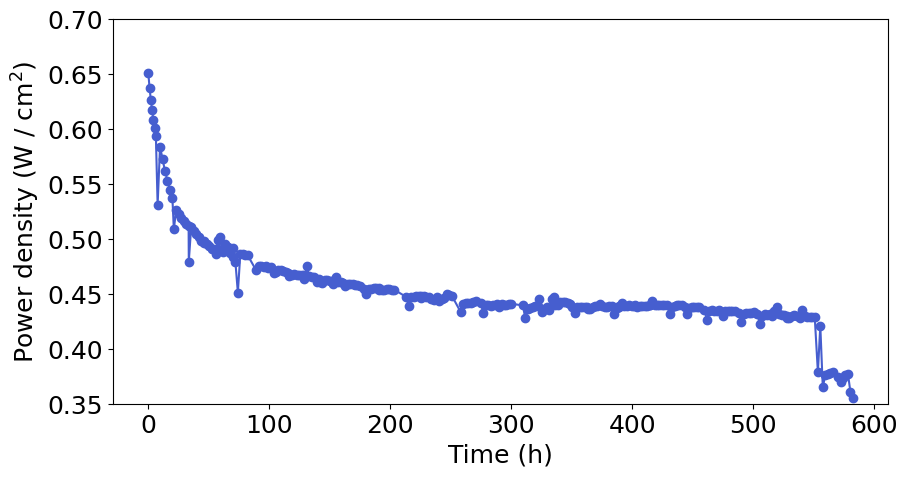

In [11]:
# load the LSV data
LSV_data = pd.read_csv('./data/LSV_merged.csv')
power_density_all = []
peak_power_density = []
test_size = int(len(LSV_data.columns)/2)
for i in range(test_size):
    last_ind = LSV_data.iloc[:, 2*i].last_valid_index()
    power_density = -LSV_data.iloc[:last_ind+1, 2*i]/1000/0.07065 * LSV_data.iloc[:last_ind+1, 2*i+1] # I * E to get the power density in W/cm^2
    power_density_all.append(power_density)
    peak_power_density.append(max(abs(power_density)))

# process the time label
time_format = '%Y-%m-%d %H:%M:%S.%f'
diff_time = [datetime.strptime(t, time_format)-datetime.strptime(time_list[0], time_format) for t in time_list]
time_hour = [t.total_seconds()/3600 for t in diff_time]

# plot the peak power density versus time in hour
plt.plot(time_hour, peak_power_density, 'o-', color = color[10])
plt.ylim(0.35,0.7)

plt.xlabel('Time (h)')
plt.ylabel('Power density (W / cm$^2$)')
plt.show()